In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Report

In [3]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.0 MB 1.4 MB/s 
     |████████████████████████████████| 102 kB 30.6 MB/s 
     |████████████████████████████████| 690 kB 63.4 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 9.8 MB 53.1 MB/s 
     |████████████████████████████████| 4.7 MB 55.7 MB/s 
     |████████████████████████████████| 296 kB 74.9 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.4.0-py2.py3-none-any.whl size=315269 sha256=f60fae4248539cd355347c67363f4a18afa75b32ff68280211ed1563b0237552
  Stored in directory: /tmp/pip-ephem-wheel-cache-sm6bfsp7/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=71c5a6575e6c8c89d4899c411adc60fed2bf1ee72bd59c54271a3283037e27b5
  Stored in directory: /root/.cache/pip/whe

In [2]:
df=pd.read_csv("/content/drive/MyDrive/AICU/TomQuality.csv")
df

,%time,Flavour,TSS,Acid,%Juice,Bite,Weight,DMC_fruit
0,43880,80,9.00,14.5,67,219,9.00,NaN
1,43894,74,8.30,13.6,60,277,10.10,NaN
2,43908,71,8.30,12.1,53,285,11.40,8.73
3,43922,76,8.90,13.3,58,334,10.00,9.07
4,43936,73,8.90,12.5,51,290,11.00,8.71
5,43950,77,8.90,13.3,62,265,10.30,9.25
6,43964,79,9.13,12.1,64,188,11.13,8.88
7,43980,72,8.10,10.7,57,175,16.80,8.96


In [3]:
from pandas_profiling import ProfileReport

In [4]:
profile=ProfileReport(df,title="Tom quality",html={"style":{"full_width":False}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
profile.to_file(output_file="Tom quality.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
!ls

 drive	 sample_data  'Tom quality.html'


In [3]:
import datetime as dt
df['%time'] = pd.TimedeltaIndex(df['%time'], unit='d') + dt.datetime(1899, 12, 30)

In [4]:
df

,%time,Flavour,TSS,Acid,%Juice,Bite,Weight,DMC_fruit
0,2020-02-19,80,9.00,14.5,67,219,9.00,NaN
1,2020-03-04,74,8.30,13.6,60,277,10.10,NaN
2,2020-03-18,71,8.30,12.1,53,285,11.40,8.73
3,2020-04-01,76,8.90,13.3,58,334,10.00,9.07
4,2020-04-15,73,8.90,12.5,51,290,11.00,8.71
5,2020-04-29,77,8.90,13.3,62,265,10.30,9.25
6,2020-05-13,79,9.13,12.1,64,188,11.13,8.88
7,2020-05-29,72,8.10,10.7,57,175,16.80,8.96


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   %time      8 non-null      datetime64[ns]
 1   Flavour    8 non-null      int64         
 2   TSS        8 non-null      float64       
 3   Acid       8 non-null      float64       
 4   %Juice     8 non-null      int64         
 5   Bite       8 non-null      int64         
 6   Weight     8 non-null      float64       
 7   DMC_fruit  7 non-null      object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 640.0+ bytes


In [6]:
df['DMC_fruit'] = df['DMC_fruit'].astype(float)

In [7]:
df.isnull().sum()

%time        0
Flavour      0
TSS          0
Acid         0
%Juice       0
Bite         0
Weight       0
DMC_fruit    2
dtype: int64

In [8]:
df["DMC_fruit"]=df["DMC_fruit"].fillna(df["DMC_fruit"].mean())

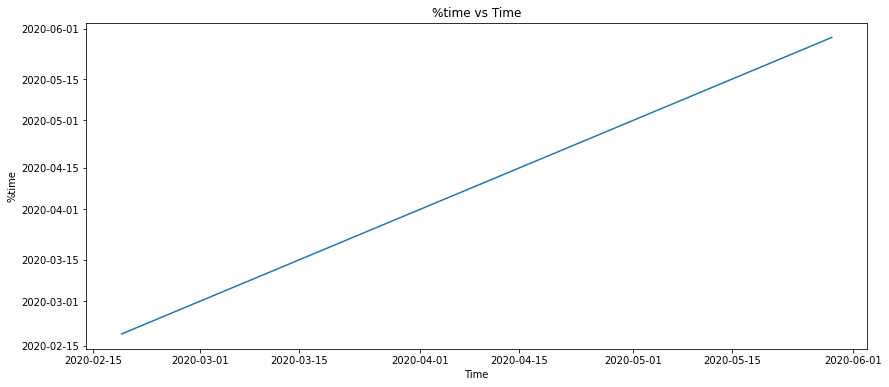

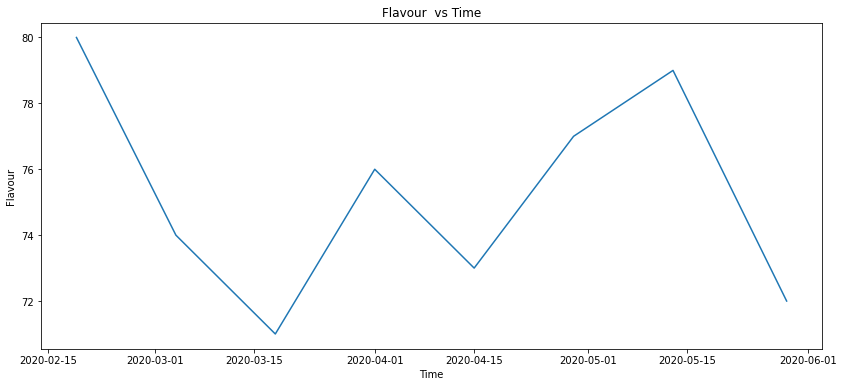

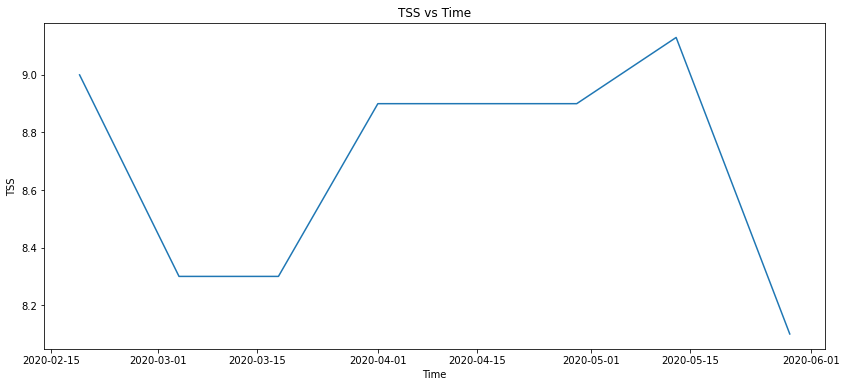

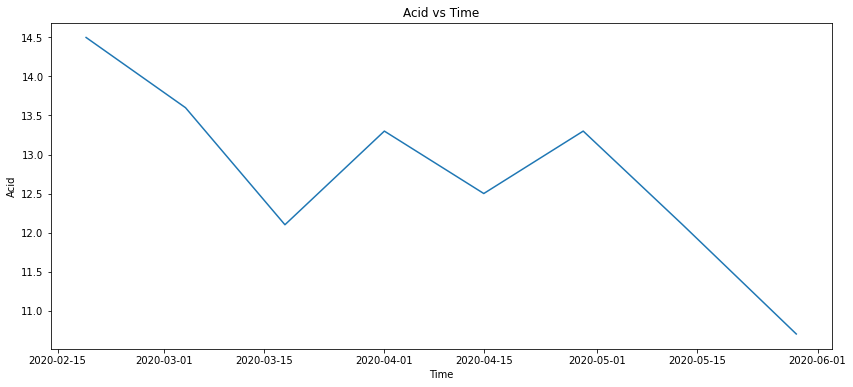

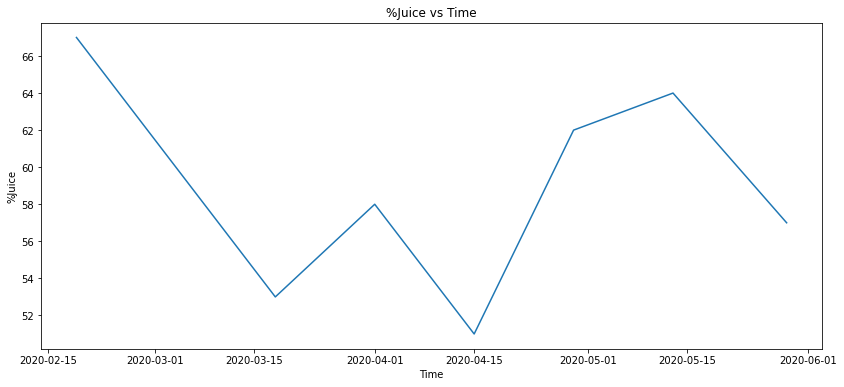

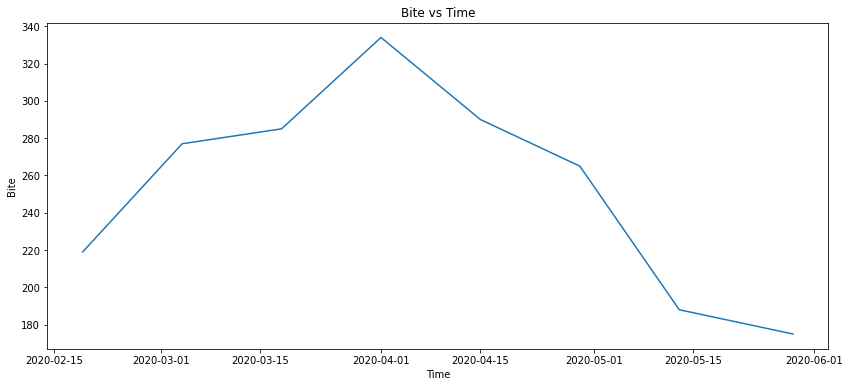

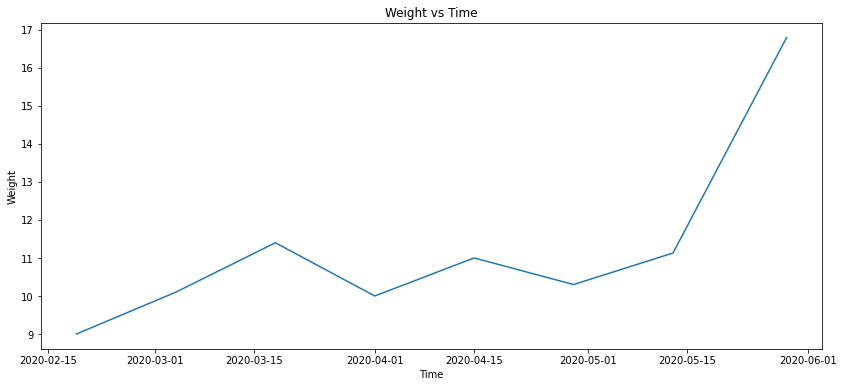

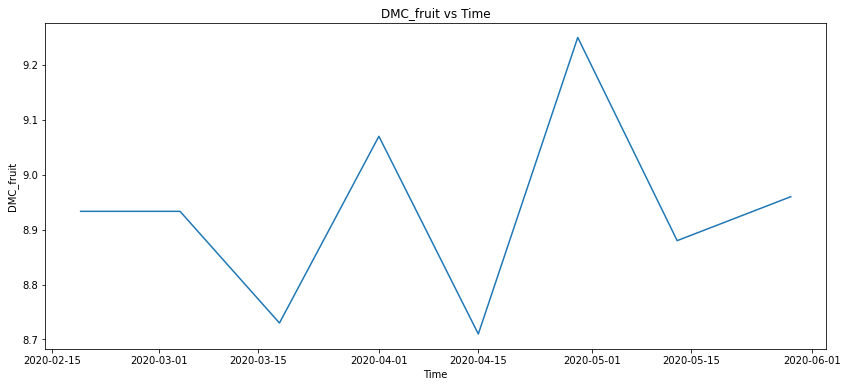

In [9]:
for i in df:
  plt.figure(figsize=(14,6))
  sns.lineplot(data=df, x="%time", y=df[i])
  plt.title("{} vs Time".format(i))
  plt.xlabel("Time")
  plt.ylabel(i)
  plt.show()

#Observations

1.We can see that flavour increases 15 marchIt sets for sometime in april but again it rises after 15 april.

2.Total Soluble solids falls at the start it then becomes stable in march and after 15 march it increases linearly and is stable till may after which it again increases in may.

3.Just like every parameter Titratable acid level sets at the start but again after march there is a sudden increase.

4.Percentage juice pressed from the fruit wall of the tomato too increases after 15 march sets after 1 week of april then it keeps on increasing till the end of may.

5.Unlike others from the first observation Breaking force of the fruit wall becomes stronger from the start after which due to some reasons it decreases after april

6.Weight of the fruit shows true seasonality between march to may.

7.Fruit dry matter content keeps on falling right from the start of the observation.

#Conclusion

In conclusion,for most of the parameters there was a rise after the observation noted on 15 march, April proves to be the best month as most of the parameters as getting a high spike or elevation during this month.